# Testing ECG data with LAP:

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import graph_code

In [2]:
results_dir = './outputs/ecg_results/'

In [3]:
file_names = [
    results_dir + file_name 
    for file_name in os.listdir(results_dir) 
    if 'csv' in file_name
    ]

In [4]:
file_names

['./outputs/ecg_results/ecg-s_2481632641282565121024-ds_0.0-20221111-192410.csv',
 './outputs/ecg_results/ecg-s_2481632641282565121024-ds_1.0-20221111-180035.csv']

In [5]:
results = pd.DataFrame()

# loading

for file_name in file_names:
    results_temp = pd.read_csv(file_name)
    
    results = pd.concat([results, results_temp]).reset_index(drop=True)

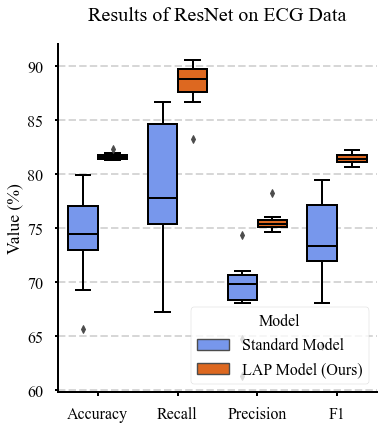

In [6]:
metric_names = {
    'accuracy_score': 'Accuracy',
    'recall_score': 'Recall',
    'precision_score': 'Precision', 
    'f1_score': 'F1',
    'auc_precision_recall_curve': 'AUC\nPrecision\nRecall Curve',
    }

with graph_code.paper_theme():
    fig, ax = plt.subplots(1,1,figsize=(7.1413*0.8,8*0.8))
    ax = graph_code.boxplot(
        data=(
            results
            .query("context == 'test'")
            .query("metric != 'auc_precision_recall_curve'")
            .rename(
                {
                    'metric': 'Metric',
                    'value': 'Value (%)',
                    'depression_strength': 'Model',
                    },
                    axis=1
                )
            .replace(
                {
                    'Model': {
                        1:'LAP Model (Ours)', 
                        0: 'Standard Model'
                        },
                    'Metric': metric_names
                    })
            .assign(
                **{'Value (%)': lambda x: x['Value (%)']*100}
                )
            ), 
        x='Metric', 
        y='Value (%)',
        hue='Model',
        hue_order=['Standard Model', 'LAP Model (Ours)',],
        ax=ax,
        palette={
            'Standard Model': '#648eff', 
            'LAP Model (Ours)': '#fd6000', 
            'Standard Model - Clean Data': '#917cf1', 
            },
        )
    ax.set_title(
        "Results of ResNet on ECG Data",
        fontsize=20,
        y=1.05
        )
    ax.legend(loc='lower right', title='Model')
    ax.set_xlabel('')

    file_name = './outputs/graphs/ecg_metrics'
    graph_code.save_fig(fig, file_name)

In [7]:
(results
    .query("context == 'test'")
    .groupby(
        by=[
            'metric',
            'depression_strength',
            ]
        )
    [['value']]
    .agg(['mean', 'std'])
    )

value          
                                                    mean       std
metric                     depression_strength                    
accuracy_score             0.0                  0.741566  0.041535
                           1.0                  0.816869  0.003240
auc_precision_recall_curve 0.0                  0.762470  0.051993
                           1.0                  0.854967  0.011746
f1_score                   0.0                  0.734355  0.046852
                           1.0                  0.814740  0.005180
precision_score            0.0                  0.689676  0.036268
                           1.0                  0.756426  0.010077
recall_score               0.0                  0.786047  0.064733
                           1.0                  0.883389  0.021870